In [ ]:
!nvidia-smi

Thu May 20 06:32:14 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8    26W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"romanregmi","key":"4ed25198fc678f2b49eb33fcf6730abb"}'}

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

 99% 668M/675M [00:19<00:00, 50.7MB/s]
100% 675M/675M [00:19<00:00, 36.5MB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/cell-images-for-detecting-malaria.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!rm -r ./cell_images/cell_images/

In [ ]:
from fastai.vision import*

In [ ]:
data_path = Path('/content/cell_images').absolute()
model_path = Path('./model').absolute()

In [ ]:
data = ImageDataBunch.from_folder(data_path,valid_pct=0.2,size=256,
                                  ds_tfms = get_transforms()).normalize(imagenet_stats)

In [ ]:
print(data.classes)
print(len(data.train_ds))
print(len(data.valid_ds))

['Parasitized', 'Uninfected']
22047
5511


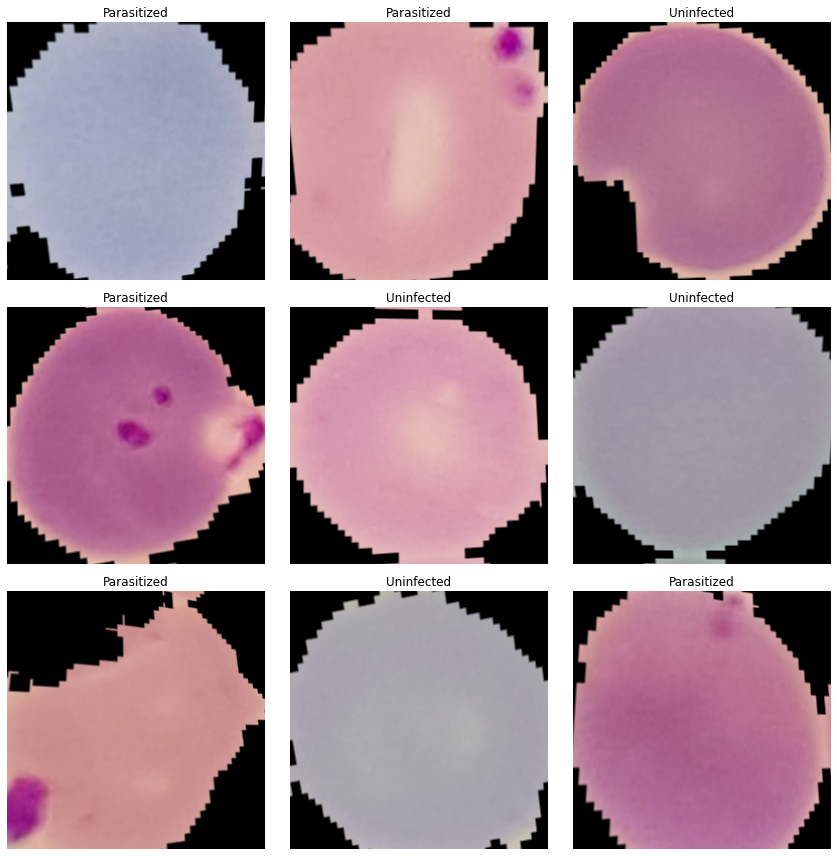

In [ ]:
data.show_batch(rows=3)

In [ ]:
learn = cnn_learner(data, models.resnet50,
                    metrics=error_rate, model_dir=model_path)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [ ]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.254849,0.155346,0.052985,07:20
1,0.179959,0.125518,0.051170,07:17
2,0.148953,0.107113,0.040283,07:17
3,0.130906,0.099740,0.037561,07:17
4,0.122566,0.099568,0.037743,07:17


In [ ]:
learn.unfreeze() # must unfreeze the learner before we can retrain it
# we will retrain the model later with better learning rate

In [ ]:
learn.lr_find() # helps you find an optimal learning rate

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


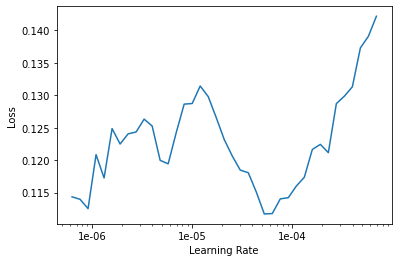

In [ ]:
learn.recorder.plot()

In [ ]:
# use the max learning rate such that for the values below it, it gives minimum loss
learn.fit_one_cycle(5, max_lr=1e-06) # retraining 

epoch,train_loss,valid_loss,error_rate,time
0,0.116752,0.101662,0.037561,09:36
1,0.109801,0.095501,0.036291,09:36
2,0.120631,0.094630,0.034477,09:37
3,0.113760,0.095510,0.037198,09:38
4,0.109966,0.094979,0.036110,09:37


In [ ]:
learn.export(model_path /'malaria.pkl') # pkl file

In [ ]:
learn.save(model_path /'malaria') # pytorch file

In [ ]:
!cp model/malaria.pkl drive/'My Drive'/ # copy the model to drive